In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [279]:
df= pd.read_csv(r"C:\Users\Rohit Thanvi\Desktop\ML-2\Online+Retail.csv")

In [280]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [282]:
round(100*(df.isnull().sum()/len(df)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [283]:
df= df.dropna()

In [284]:
df.shape

(406829, 8)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [286]:
df["amount"]= df["Quantity"] * df["UnitPrice"]

In [287]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [288]:
monetary=df.groupby("CustomerID")["amount"].sum()
monetary= monetary.reset_index()

In [289]:
monetary.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [290]:
frequency=df.groupby("CustomerID")["InvoiceNo"].count()
frequency= frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [291]:
groupedby= pd.merge(monetary,frequency, on ="CustomerID", how= "inner")

In [292]:
groupedby.head()

,CustomerID,amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [293]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [294]:
df["InvoiceDate"]=  pd.to_datetime(df["InvoiceDate"], 
                                          format='%d-%m-%Y %H:%M')

In [295]:
max_date= max(df["InvoiceDate"])

In [296]:
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [297]:
recency= df.groupby("CustomerID")["diff"].min()

In [298]:
recency.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: diff, dtype: timedelta64[ns]

In [299]:
recency= recency.reset_index()

In [300]:
recency.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [301]:
grouped_df = pd.merge(groupedby, recency, on='CustomerID', how='inner')

In [302]:
grouped_df.head()

,CustomerID,amount,InvoiceNo,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [303]:
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [304]:
grouped_df["recency"]=grouped_df["recency"].dt.days

In [305]:
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x206e30ac340>,
 'caps': [<matplotlib.lines.Line2D at 0x206e30aca00>,
 'boxes': [<matplotlib.lines.Line2D at 0x206df169ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x206e30be100>],
 'fliers': [<matplotlib.lines.Line2D at 0x206e30be460>],
 'means': []}

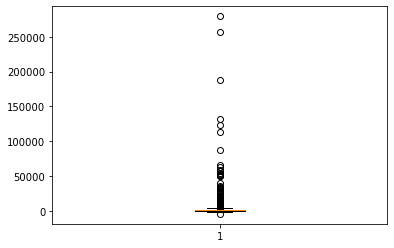

In [306]:
plt.boxplot(grouped_df["amount"])


{'whiskers': [<matplotlib.lines.Line2D at 0x206e305e940>,
 'caps': [<matplotlib.lines.Line2D at 0x206e3066040>,
 'boxes': [<matplotlib.lines.Line2D at 0x206e305e5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x206e3066700>],
 'fliers': [<matplotlib.lines.Line2D at 0x206e3066a60>],
 'means': []}

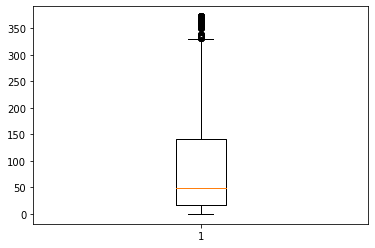

In [307]:
plt.boxplot(grouped_df["recency"])

{'whiskers': [<matplotlib.lines.Line2D at 0x206e30fb9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x206e31090d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x206e30fb670>],
 'medians': [<matplotlib.lines.Line2D at 0x206e3109790>],
 'fliers': [<matplotlib.lines.Line2D at 0x206e3109af0>],
 'means': []}

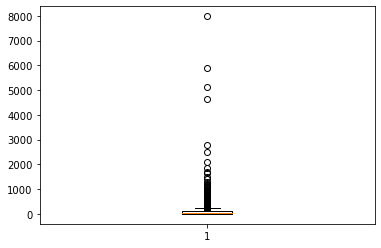

In [308]:
plt.boxplot(grouped_df["frequency"])

In [309]:
Q1=grouped_df.amount.quantile(0.05)

In [310]:
Q3=grouped_df.amount.quantile(0.95)

In [311]:
IQR= Q3 - Q1

In [312]:
grouped_df= grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

In [313]:
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]


In [314]:
rfm_df= grouped_df[["amount", "frequency", "recency"]]

In [315]:
scaler= StandardScaler()

In [316]:
rfm_df_scaled= scaler.fit_transform(rfm_df)

In [317]:
rfm_df_scaled.shape

(4293, 3)

In [318]:
rfm_df_scaled= pd.DataFrame(rfm_df_scaled)

In [319]:
rfm_df_scaled.columns= ["amount", "frequency", "recency"]

In [320]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [321]:
kmeans= KMeans(n_clusters= 4, max_iter= 50)

In [322]:
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [323]:
kmeans.labels_

array([0, 3, 2, ..., 0, 2, 2])

In [324]:
ssd= []
range_n_clusters= [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans= KMeans(n_clusters= num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)

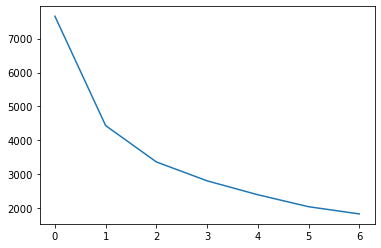

In [325]:
plt.plot(ssd)


In [330]:
range_n_clusters= [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans= KMeans(n_clusters= num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_lables= kmeans.labels_
    silhouette_avg=silhouette_score(rfm_df_scaled, cluster_lables)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.477782010021685
For n_clusters=5, the silhouette score is 0.4662700564189704
For n_clusters=6, the silhouette score is 0.41742250872395564
For n_clusters=7, the silhouette score is 0.41483597231479047
For n_clusters=8, the silhouette score is 0.4080909935672742


In [332]:
kmeans= KMeans(n_clusters= 3, max_iter= 50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [339]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [335]:
grouped_df["cluster_id"]= kmeans.labels_

In [336]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='cluster_id', ylabel='amount'>

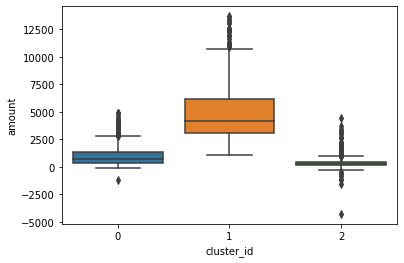

In [338]:
sns.boxplot(x= "cluster_id", y="amount", data= grouped_df)

In [340]:
mergings= linkage(rfm_df_scaled, method= "single", metric= "euclidean")

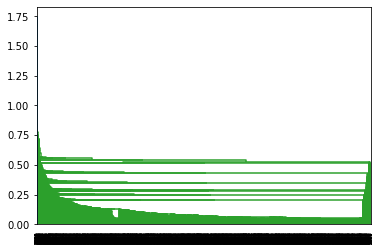

In [342]:
dendrogram(mergings)
plt.show()

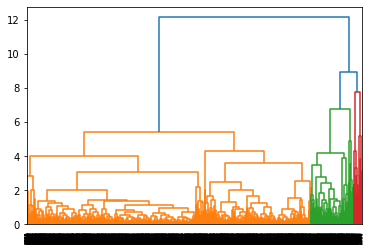

In [343]:
mergings= linkage(rfm_df_scaled, method= "complete", metric= "euclidean")
dendrogram(mergings)
plt.show()

In [344]:
cluster_labels= cut_tree(mergings, n_clusters=3).reshape(-1)

In [345]:
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [346]:
grouped_df["cluster_labels"]= cluster_labels

In [347]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

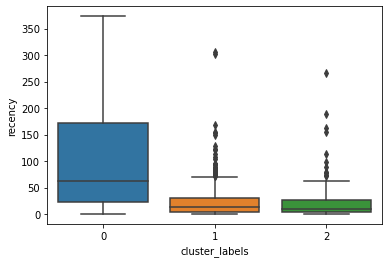

In [350]:
sns.boxplot(x= "cluster_labels", y= "recency", data = grouped_df)


<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

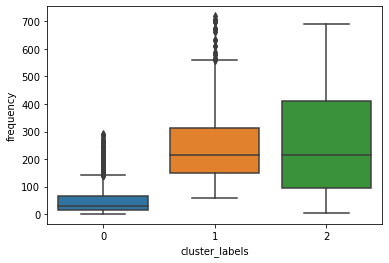

In [351]:
sns.boxplot(x= "cluster_labels", y= "frequency", data = grouped_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='amount'>

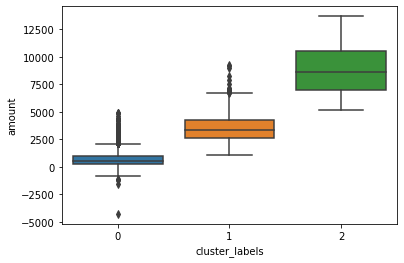

In [352]:
sns.boxplot(x= "cluster_labels", y= "amount", data = grouped_df)